# 本日の課題　1⃣<br><br>Lesson structure

---

<b>⓵</b>画像分類AIとは？<br>- What is an image classification AI?<br>

---

<b>⓶</b>画像分類AIを作ってみよう<br>- Let's create an image classification AI<br>

<b>STEP 1</b><br>AIを作るために訓練用の画像をダウンロードしましょう<br>- Let's download images for our AI to train on<br>

<b>STEP 2</b><br>ダウンロードした画像の確認<br>- Check out the images downloaded<br>

<b>STEP 3</b><br>AIモデルを作り、ダウンロードした画像を使って訓練を実行しよう<br>- Let's create the AI model and train it on the images downloaded<br>

<b>STEP 4</b><br>画像をダウンロードして正しく分類してくれるか確認しよう<br>- Let's download some images manually and check that our model actually works<br>

---

<b>⓷</b>次にすることについて<br>- What we will be doing next<br>

---

## <b>⓵</b>画像分類AIとは？<br>- What is an image classification AI?

画像分類AIとはAIの一種であり、インプットされた画像の内容からとある判断を下すものだ。グーグルの画像検索*が画像分類AIの例の一つであり、この画像検索ではインプットされた画像の内容により検索結果が変わるものだ。

An image classification AI is a form of AI that makes a decision on what an image it was fed represents. An example of this would be Google image search*, where the search results are influenced by what the image you gave it contains.

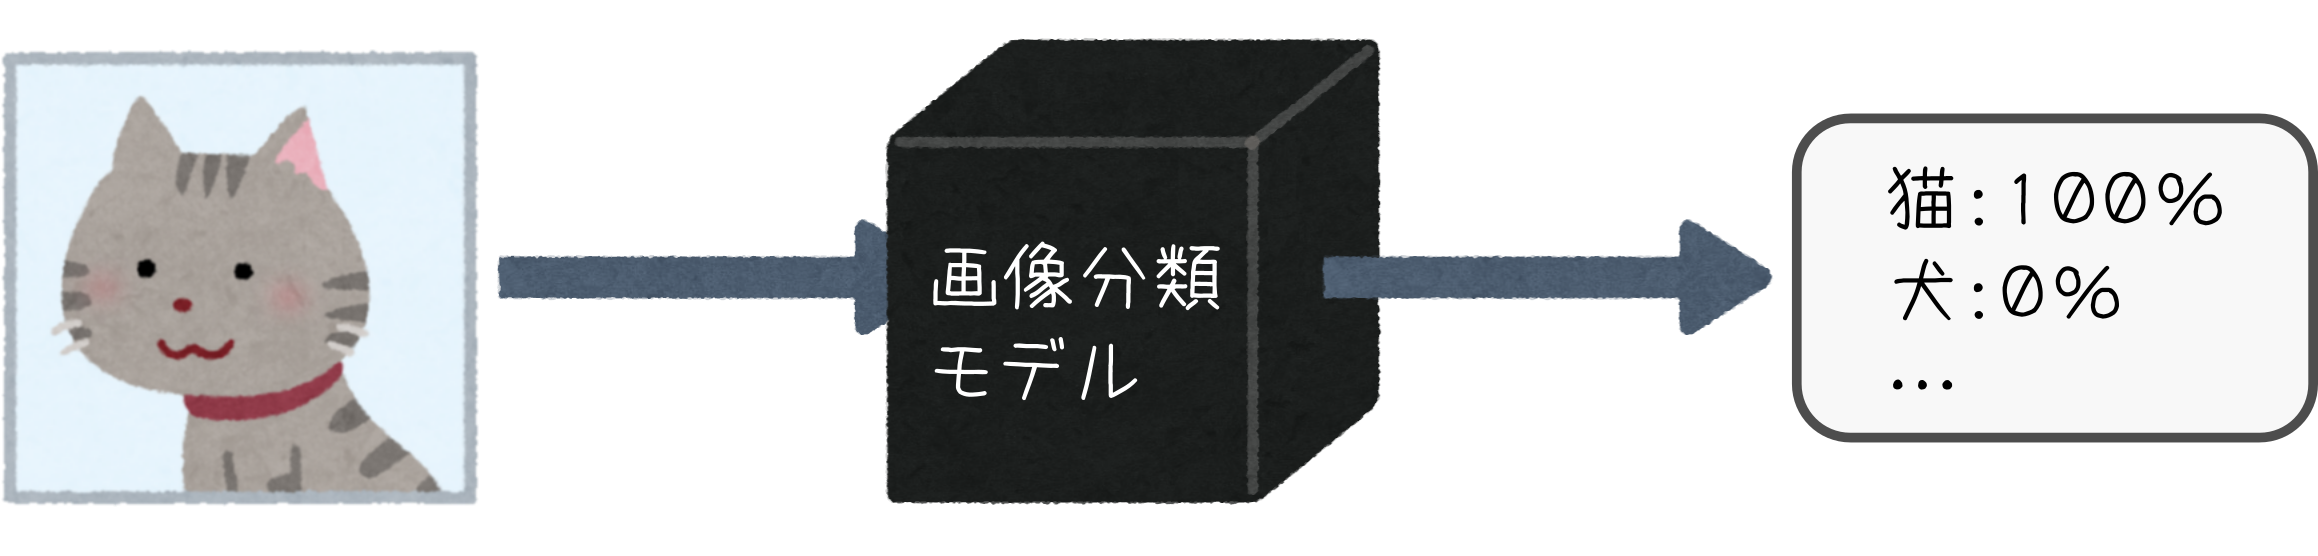

上記の画像のモデル部分は後ほど説明します。

The model shown above will be explained into further detail in the later parts of this lesson.

## <b>⓶</b>画像分類AIを作ってみよう<br>- Let's create an image classification AI

### <b>STEP 1</b><br>AIを作るために訓練用の画像をダウンロードしましょう<br>- Let's download images for our AI to train on

まず初めに、AIとは何をするべきか全く分からない状態からスタートするため、練習（正式には訓練と言う）用の画像を渡す必要がある。今回、オンラインの検索エンジンから数百枚の画像をダウンロードして、今から作っていくAIに渡しましょう。

First and foremost, AIs do not start out knowing what to do*, and requires training data for it to learn on. In our case, we will be downloading a few hundred different images from a search engine, and will be feeding it to the AI model for it to learn on.

In [ ]:
from utils import DatasetDownloader, save_file

ds_path = save_file()
dd = DatasetDownloader(ds_path)

# What images do you want to download?
queries = (
    "rose_flower",        # <<<
    "tulip_flower",       # <<<
    "sunflower_flower",   # <<<
    "daisy_flower",       # <<<
    "poppy_flower",       # <<<
)
dd.dl_jobs(queries, hundreds=1)

### <b>STEP 2</b><br>ダウンロードした画像の確認<br>- Check out the images downloaded

ちゃんと画像がダウンロードできたかどうか確認しよう。

Let's check if our images were downloaded correctly.

In [ ]:
from utils import open_file
from PIL import Image

Image.open(open_file(ds_path))

自分が思ったことと違う画像が保存されていることはよくあることだ。例えば「apple」と検索した場合、果物のリンゴが出てこず、「Apple」のブランド製品が出てきたりする。AIではどのようなデータが訓練に使われているかを確認することも大事な作業だが、今回はこのままにしておく。

Some images may not be what you expect. For example, if you entered the query "apple" hoping to get pictures of the fruit apple, you may result in the brand "Apple". Checking your datasets when training AI is important, though in this case we will not be dealing with these unexpected images.

### <b>STEP 3</b><br>AIモデルを作り、ダウンロードした画像を使って訓練を実行しよう<br>- Let's create the AI model and train it on the images downloaded

In [ ]:
from torchvision.models import shufflenet_v2_x0_5, ShuffleNet_V2_X0_5_Weights
from torchvision import datasets, transforms
from utils import train
from torch import nn
import os

os.environ["TORCH_HOME"] = os.path.join(os.getcwd(), "utils")
data_transform = ShuffleNet_V2_X0_5_Weights.IMAGENET1K_V1.transforms()

model = shufflenet_v2_x0_5(weights=ShuffleNet_V2_X0_5_Weights.IMAGENET1K_V1)
for param in model.parameters():
    param.require_grad = False
model.fc = nn.Sequential(
    nn.Linear(1024, len(queries)),
    nn.Softmax(dim=1)
)

train_dataset = datasets.ImageFolder(
    os.path.join(ds_path, "train"), 
    transform=data_transform
)

test_dataset = datasets.ImageFolder(
    os.path.join(ds_path, "test"), 
    transform=data_transform
)

train(model, train_dataset, test_dataset, 10)

下のリンクを開いて訓練の進捗を確認してみよう<br>
<a href="http://localhost:6006/?darkMode=true#scalars&_smoothingWeight=0">正確度グラフを見てみよう</a>

Open the link below to view the model's training progress. <br>
<a href="http://localhost:6006/?darkMode=true#scalars&_smoothingWeight=0">Check out the training accuracy graph</a>

### <b>STEP 4</b><br>画像をダウンロードして正しく分類してくれるか確認しよう<br>- Let's download some images manually and check that our model actually works

In [ ]:
from utils import visualize

visualize(
    open_file(), model, data_transform, test_dataset.classes
)

AIはちゃんと画像を分類することができたでしょうか？

Did the AI successfully classify the images you gave it?

## <b>⓷</b>次にすることについて<br>- What we will be doing next

画像分類AIにはどのようなことができるのか分かりましたか？次は、AIの中身は何でできているのか、そしてどのように訓練されるのかを説明していきます。

Now that we have experienced what an image classification AI can do, in the next section, we will be learning the inner workings of AIs, and how they get trained to solve tasks.